In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split 

import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, roc_auc_score

## Utilisation de toutes les variables 

In [5]:

data=pd.read_csv('Database_propre.csv')


prediction=data['prediction']
data= data.drop('prediction', axis=1)

x_train,x_test,y_train,y_test=train_test_split(data,prediction,test_size=0.3,random_state=42)


#Standardisation des données


scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



#Model 1:  2 hidden layer

model=Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(26, activation='relu'))       #first hidden layer
model.add(Dense(13, activation='relu'))                        # second hidden layer

#model.add(Dense( 32, activation='relu'))                      #third hidden layer 

model.add(Dense(1, activation="sigmoid"))                     #output layer 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model 

history= model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)



#code visualisation des courbes de perte et d'accuracy 

plt.figure(figsize=(12, 5))



plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()



### Metrique 

y_pred=model.predict(x_test)
# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)



recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)


#Model 2 et 3 

#3 Hidden layers ou 4 




model=Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(26, activation='relu')) #first hidden layer

#model.add(Dense(20, activation='relu'))    
model.add(Dense(13, activation='relu'))                        # second hidden layer

model.add(Dense(6, activation='relu'))                      #third hidden layer 

model.add(Dense(1, activation="sigmoid"))                     #output layer 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model 

history= model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)





NameError: name 'StandardScaler' is not defined

## Problème déséquilibre de classe

## SMOTE 

In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [172]:
#Creation d'un modèle de réseau de neuronne 

import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


model=Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(26, activation='relu'))     #first hidden layer
model.add(Dense(13, activation='relu'))                        # second hidden layer

model.add(Dense( 6, activation='relu'))                  #third hidden layer 

model.add(Dense(1, activation="sigmoid"))                     #output layer 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model 

history= model.fit(X_resampled, y_resampled, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 9s 416us/step - accuracy: 0.8494 - loss: 0.3369 - val_accuracy: 0.3979 - val_loss: 1.1617
Epoch 2/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 402us/step - accuracy: 0.8620 - loss: 0.3096 - val_accuracy: 0.4550 - val_loss: 1.0772
Epoch 3/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 409us/step - accuracy: 0.8642 - loss: 0.3041 - val_accuracy: 0.4983 - val_loss: 0.9903
Epoch 4/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 405us/step - accuracy: 0.8658 - loss: 0.3007 - val_accuracy: 0.5206 - val_loss: 0.9656
Epoch 5/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 405us/step - accuracy: 0.8666 - loss: 0.2979 - val_accuracy: 0.4186 - val_loss: 1.1053
Epoch 6/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 405us/step - accuracy: 0.8689 - loss: 0.2938 - val_accuracy: 0.5044 - val_loss: 0.9777
Epoch 7/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 408us/step - accuracy: 0.8691 - loss: 0.2939 - val_accuracy: 0.4539 - val_loss: 1.0574
Epoch 8/10
19072/19072 ━━━━━━━━━━━━━━━━━━━━ 8s 419us/step - ac

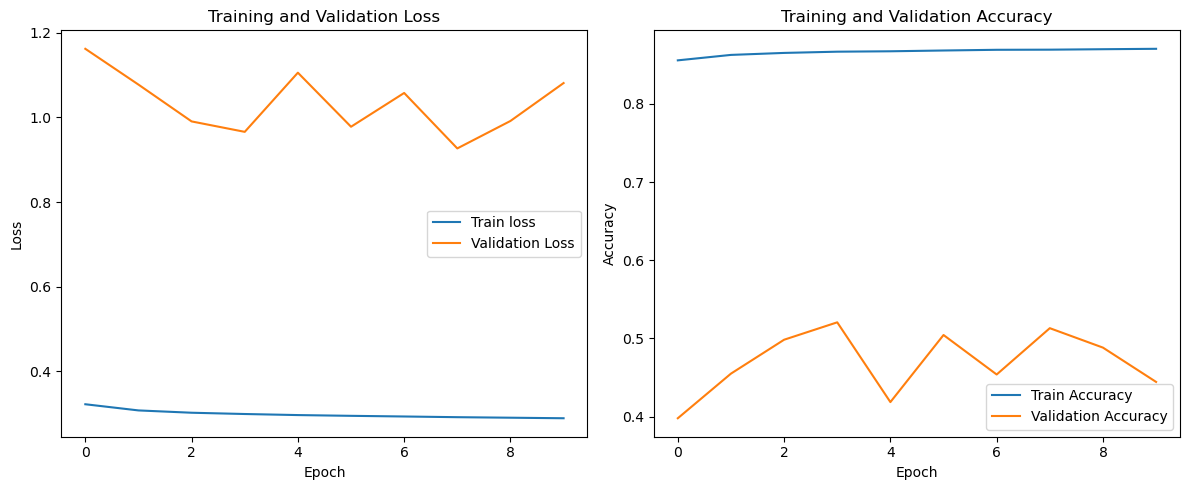

In [174]:
plt.figure(figsize=(12, 5))

# regardons  les courbes du training et la validation loss (perte d'entrainement ou de validation) en fonction du nombre d'epochs 


plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [176]:
y_pred=model.predict(x_test)
# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import recall_score, precision_score, roc_auc_score , f1_score

recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print('f1_score=',f1_score(y_test,y_pred))

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

4026/4026 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step
f1_score= 0.12268000526523627
recall= 0.28836633663366334
precision= 0.07791339240929611
roc_auc= 0.6225026638667264


In [180]:
from imblearn.under_sampling import RandomUnderSampler

# Définir l'undersampling pour équilibrer les classes
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # 50% de la classe majoritaire
X_resampled, y_resampled = undersampler.fit_resample(x_train, y_train)

model=Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(26, activation='relu'))       #first hidden layer
model.add(Dense(13, activation='relu'))                        # second hidden layer

model.add(Dense(6, activation='relu'))                      #third hidden layer 

model.add(Dense(1, activation="sigmoid"))                     #output layer 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model 

history= model.fit(X_resampled, y_resampled, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7786 - loss: 0.5009 - val_accuracy: 0.2706 - val_loss: 1.2859
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8430 - loss: 0.3553 - val_accuracy: 0.2054 - val_loss: 1.3621
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8487 - loss: 0.3442 - val_accuracy: 0.2733 - val_loss: 1.2997
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8468 - loss: 0.3456 - val_accuracy: 0.2489 - val_loss: 1.3375
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8489 - loss: 0.3376 - val_accuracy: 0.2507 - val_loss: 1.3024
Epoch 6/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8500 - loss: 0.3387 - val_accuracy: 0.3173 - val_loss: 1.3000
Epoch 7/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.8487 - loss: 0.3326 - val_accuracy: 0.2985 - val_loss: 1.3029
Epoch 8/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.8543 - loss: 0.3316 - 

In [182]:
y_pred=model.predict(x_test)
# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import recall_score, precision_score, roc_auc_score , f1_score

recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print('f1_score=',f1_score(y_test,y_pred))

print('recall=',recall)
print('precision=',precision)
print('roc_auc=',roc_auc)

4026/4026 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
f1_score= 0.12138364779874214
recall= 0.3582920792079208
precision= 0.07306915699141847
roc_auc= 0.6502714602411274
